In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
training_mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
training_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,0,1,3,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,1,1,1,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,0,1,2,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,1,2,2,3,6,0,2,1,4,2,5,0,0


In [ ]:
X = training_mush.drop(['class'], axis=1)
y = training_mush['class']

In [ ]:
clf = RandomForestClassifier()

In [ ]:
parametrs = {'n_estimators':range(10, 51, 10),
             'max_depth':range(1, 13, 2),
             'min_samples_leaf':range(1,8),
             'min_samples_split':range(2,10,2)}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)

In [ ]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf.score(X, y)

1.0

In [ ]:
feature_importances = best_clf.feature_importances_

In [ ]:
feature_importances_df = pd.DataFrame({'feature':list(X),
                                       'feature_importances':feature_importances})

In [ ]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
4,odor,0.217535
7,gill-size,0.130013
3,bruises,0.085286
8,gill-color,0.079971
18,ring-type,0.079003
10,stalk-root,0.074227
19,spore-print-color,0.071638
6,gill-spacing,0.070385
11,stalk-surface-above-ring,0.048427
20,population,0.027278


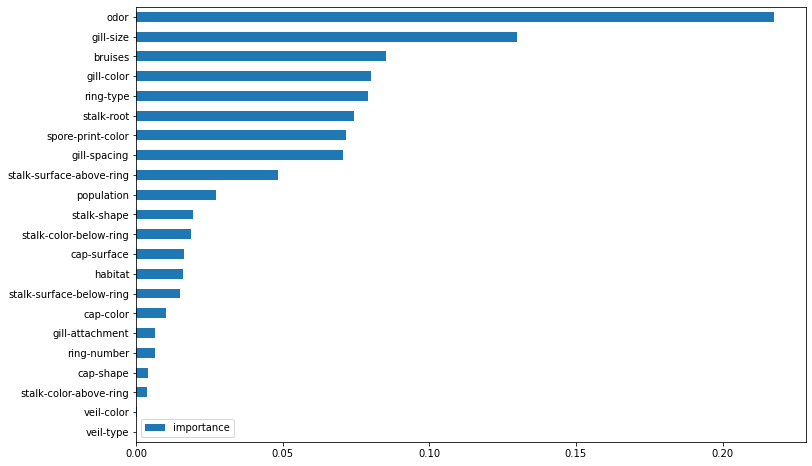

In [ ]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
testinging_mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
testinging_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,2,2,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,1,2,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,0,2,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,0,2,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,0,2,1,6,6,0,2,1,0,7,4,4


In [ ]:
X_test = testinging_mush

In [ ]:
result = grid_search_cv_clf.predict(X_test)

In [ ]:
pd.Series(result).value_counts()

0    1055
1     976
dtype: int64